### Phase 1: Ising Model

$$H = \sum_{i=1}^{N} a_i X_i + \sum_{i=1}^{N} \sum_{j=1}^{i-1} J_{ij} Z_i Z_j
$$

#### Step 1: generate the Ising Model frim the Obs

In [1]:
import numpy as np
from qat.core import Observable, Term

def ising(N):
    np.random.seed(123)  

    terms = []

    # Generate random coefficients for the transverse field term (X)
    a_coefficients = np.random.random(N)
    for i in range(N):
        term = Term(coefficient=a_coefficients[i], pauli_op="X", qbits=[i])
        terms.append(term)

    # Generate random coefficients for the interaction term (ZZ)
    J_coefficients = np.random.random((N, N))
    for i in range(N):
        for j in range(i):
            if i != j:  # avoid duplicate terms
                term = Term(coefficient=J_coefficients[i, j], pauli_op="ZZ", qbits=[i, j])
                terms.append(term)
    ising = Observable(N, pauli_terms=terms, constant_coeff=0.0)
    return ising


In [2]:
model = ising(4) 
print("Transverse Ising Model:", model)

Transverse Ising Model: 0.6964691855978616 * (X|[0]) +
0.28613933495037946 * (X|[1]) +
0.2268514535642031 * (X|[2]) +
0.5513147690828912 * (X|[3]) +
0.48093190148436094 * (ZZ|[1, 0]) +
0.4385722446796244 * (ZZ|[2, 0]) +
0.05967789660956835 * (ZZ|[2, 1]) +
0.18249173045349998 * (ZZ|[3, 0]) +
0.17545175614749253 * (ZZ|[3, 1]) +
0.5315513738418384 * (ZZ|[3, 2])


In [3]:
print(model.terms)

[Term(_coeff=TNumber(is_abstract=False, type=1, int_p=None, double_p=0.6964691855978616, string_p=None, matrix_p=None, serialized_p=None, complex_p=None), op='X', qbits=[0], _do_validity_check=True), Term(_coeff=TNumber(is_abstract=False, type=1, int_p=None, double_p=0.28613933495037946, string_p=None, matrix_p=None, serialized_p=None, complex_p=None), op='X', qbits=[1], _do_validity_check=True), Term(_coeff=TNumber(is_abstract=False, type=1, int_p=None, double_p=0.2268514535642031, string_p=None, matrix_p=None, serialized_p=None, complex_p=None), op='X', qbits=[2], _do_validity_check=True), Term(_coeff=TNumber(is_abstract=False, type=1, int_p=None, double_p=0.5513147690828912, string_p=None, matrix_p=None, serialized_p=None, complex_p=None), op='X', qbits=[3], _do_validity_check=True), Term(_coeff=TNumber(is_abstract=False, type=1, int_p=None, double_p=0.48093190148436094, string_p=None, matrix_p=None, serialized_p=None, complex_p=None), op='ZZ', qbits=[1, 0], _do_validity_check=True)

In [4]:
print(model.nbqbits)

4


In [5]:
print(model.to_matrix)

<bound method Observable.to_matrix of Observable(terms=[Term(_coeff=TNumber(is_abstract=False, type=1, int_p=None, double_p=0.6964691855978616, string_p=None, matrix_p=None, serialized_p=None, complex_p=None), op='X', qbits=[0], _do_validity_check=True), Term(_coeff=TNumber(is_abstract=False, type=1, int_p=None, double_p=0.28613933495037946, string_p=None, matrix_p=None, serialized_p=None, complex_p=None), op='X', qbits=[1], _do_validity_check=True), Term(_coeff=TNumber(is_abstract=False, type=1, int_p=None, double_p=0.2268514535642031, string_p=None, matrix_p=None, serialized_p=None, complex_p=None), op='X', qbits=[2], _do_validity_check=True), Term(_coeff=TNumber(is_abstract=False, type=1, int_p=None, double_p=0.5513147690828912, string_p=None, matrix_p=None, serialized_p=None, complex_p=None), op='X', qbits=[3], _do_validity_check=True), Term(_coeff=TNumber(is_abstract=False, type=1, int_p=None, double_p=0.48093190148436094, string_p=None, matrix_p=None, serialized_p=None, complex_p

In [6]:
print(model.constant_coeff)

0.0


#ising_matrix = model.get_matrix(sparse=True)

Basically, the observable has no attribute to the Matrix representation


#### Step 2: Creat 4 initial states manually from creating the circuit gates
$$\begin{array}{c}|0000\rangle \\ |0001\rangle \\ |0010\rangle \\ |0011\rangle \end{array}$$

In [7]:
from qat.lang import Program, H, X, Y, Z, I, PH, S, T, RX, RY, RZ, CNOT, ISWAP, SQRTSWAP, CCNOT, SWAP

from qat.interop.qiskit import qlm_to_qiskit
import matplotlib as mpl
import numpy as np



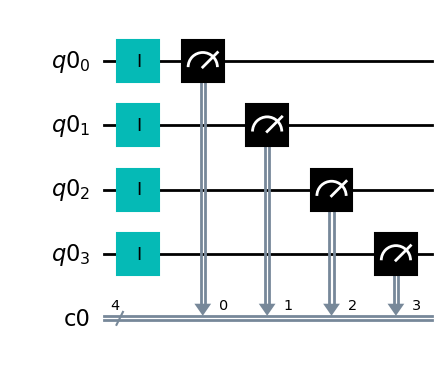

In [8]:
# this is 0000
nqbits = model.nbqbits
prog = Program()
reg = prog.qalloc(nqbits) 

for i in range(nqbits):
    prog.apply(I, reg[i])

circ0 = prog.to_circ()

ckt = qlm_to_qiskit(circ0)
ckt.draw(output='mpl')


In [9]:
from qat.qpus import get_default_qpu

qpu = get_default_qpu()
job_0 = circ0.to_job(nbshots=0)
result_0 = qpu.submit(job_0)

print("\nThis initial state is:")
for s in result_0:
    print(s.state) #


This initial state is:
|0000>


In [10]:
from qat.qpus import PyLinalg
from qat.plugins import ObservableSplitter

job_0 = circ0.to_job("OBS", observable=model)
print("Exact number of ones:", qpu.submit(job_0).value)

Exact number of ones: 1.8686769032163846


In [11]:
job_0 = circ0.to_job(nbshots=0)
result_0 = qpu.submit(job_0)

states_0 = [s.state for s in result_0]
measurements_0 = [qpu.submit(circ0.to_job("OBS", observable=model)).value] * len(states_0)
state_labels_0 = ["0000"] * len(states_0)

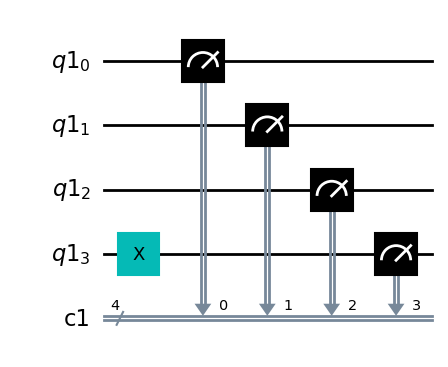

In [12]:
# this is 0001
nqbits = model.nbqbits
prog = Program()
reg = prog.qalloc(nqbits) 

prog.apply(X, reg[nqbits-1])

circ1 = prog.to_circ()

ckt = qlm_to_qiskit(circ1)
ckt.draw(output='mpl')

In [13]:
from qat.qpus import get_default_qpu

qpu = get_default_qpu()
job_1 = circ1.to_job(nbshots=1000)
result_1 = qpu.submit(job_1)

print("\nThis initial state is:")
for s in result_1:
    print(s.state) #s.amplitude


This initial state is:
|0001>


In [14]:
from qat.qpus import PyLinalg
from qat.plugins import ObservableSplitter

job_1 = circ1.to_job("OBS", observable=model)
print("Exact number of ones:", qpu.submit(job_1).value)

Exact number of ones: 0.08968718233072281


In [15]:
job_1 = circ1.to_job(nbshots=1000)
result_1 = qpu.submit(job_1)

states_1 = [s.state for s in result_1]
measurements_1 = [qpu.submit(circ1.to_job("OBS", observable=model)).value] * len(states_1)
state_labels_1 = ["0001"] * len(states_1)

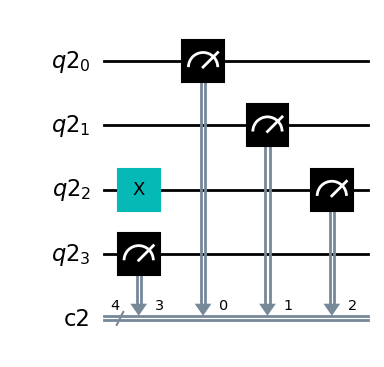

In [16]:
# this is 0010
nqbits = model.nbqbits
prog = Program()
reg = prog.qalloc(nqbits) 

prog.apply(X, reg[nqbits-2])

circ2 = prog.to_circ()

ckt = qlm_to_qiskit(circ2)
ckt.draw(output='mpl')

In [17]:
from qat.qpus import get_default_qpu

qpu = get_default_qpu()
job_2 = circ2.to_job(nbshots=1000)
result_2 = qpu.submit(job_2)

print("\nThis initial state is:")
for s in result_2:
    print(s.state) #s.amplitude


This initial state is:
|0010>


In [18]:
from qat.qpus import PyLinalg
from qat.plugins import ObservableSplitter

job_2 = circ2.to_job("OBS", observable=model)
print("Exact number of ones:", qpu.submit(job_2).value)

Exact number of ones: -0.19092612704567768


In [19]:
# Example for state "0010"
job_2 = circ2.to_job(nbshots=1000)
result_2 = qpu.submit(job_2)

states_2 = [s.state for s in result_2]
measurements_2 = [qpu.submit(circ2.to_job("OBS", observable=model)).value] * len(states_2)
state_labels_2 = ["0010"] * len(states_2)

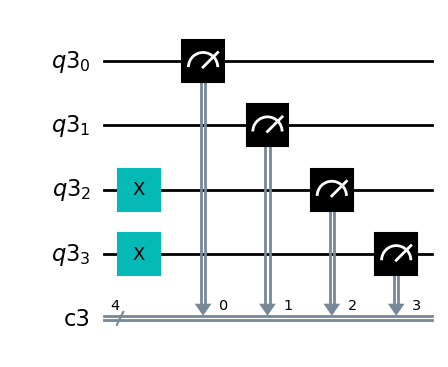

In [20]:
# this is 0011
nqbits = model.nbqbits
prog = Program()
reg = prog.qalloc(nqbits) 

prog.apply(X, reg[nqbits-2])
prog.apply(X, reg[nqbits-1])


circ3 = prog.to_circ()

ckt = qlm_to_qiskit(circ3)
ckt.draw(output='mpl')

In [21]:
from qat.qpus import get_default_qpu

qpu = get_default_qpu()
job_3 = circ3.to_job(nbshots=1000)
result_3 = qpu.submit(job_3)

print("\nThis initial state is:")
for s in result_3:
    print(s.state) #s.amplitude


This initial state is:
|0011>


In [22]:
from qat.qpus import PyLinalg
from qat.plugins import ObservableSplitter

job_3 = circ3.to_job("OBS", observable=model)
print("Exact number of ones:", qpu.submit(job_3).value)

Exact number of ones: 0.15628964743601403


In [23]:
states_3 = [s.state for s in result_3]
measurements_3 = [qpu.submit(circ3.to_job("OBS", observable=model)).value] * len(states_3)
state_labels_3 = ["0011"] * len(states_3)


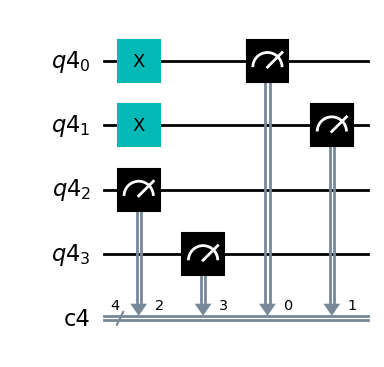

In [24]:
# this is 1100
nqbits = model.nbqbits
prog = Program()
reg = prog.qalloc(nqbits) 

prog.apply(X, reg[nqbits-4])
prog.apply(X, reg[nqbits-3])


circ4 = prog.to_circ()

ckt = qlm_to_qiskit(circ4)
ckt.draw(output='mpl')

In [32]:
from qat.qpus import get_default_qpu

qpu = get_default_qpu()
job_4 = circ4.to_job(nbshots=1000)
result_4 = qpu.submit(job_4)

print("\nThis initial state is:")
for s in result_4:
    print(s.state) #s.amplitude


This initial state is:
|1100>


In [33]:
from qat.qpus import PyLinalg
from qat.plugins import ObservableSplitter

job_4 = circ4.to_job("OBS", observable=model)
print("Exact number of ones:", qpu.submit(job_4).value)

Exact number of ones: 0.15628964743601403


In [34]:
states_4 = [s.state for s in result_4]
measurements_4 = [qpu.submit(circ4.to_job("OBS", observable=model)).value] * len(states_4)
state_labels_4 = ["0011"] * len(states_4)

#### Step3: Make the plot histogram for the comparsion

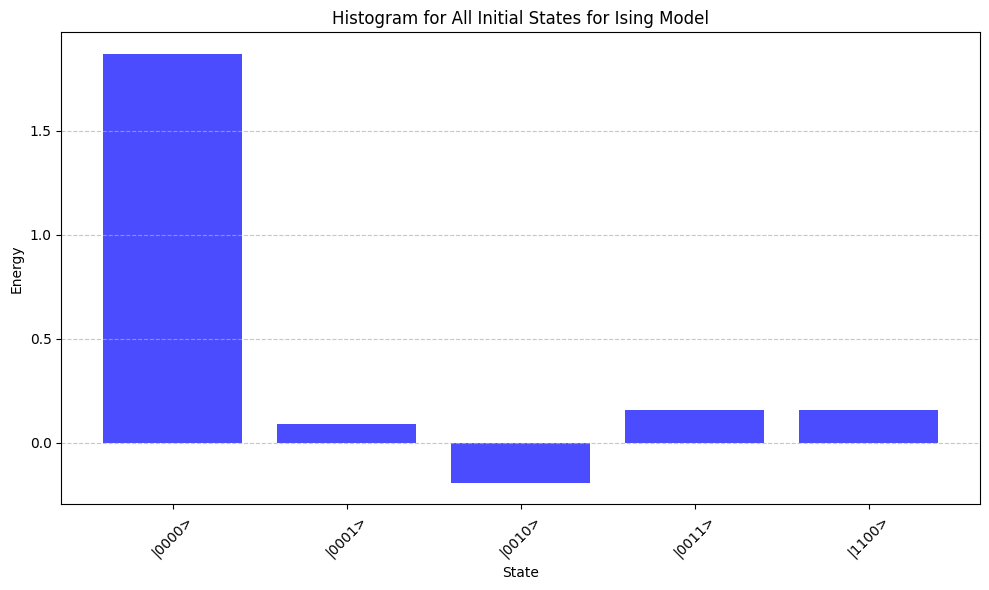

In [37]:
import matplotlib.pyplot as plt

# Function to plot a histogram for each initial state
def plot_histogram(states, measurements, state_labels):
    """
    Plot a histogram for each initial state.

    Parameters:
    - states: List of lists, where each inner list contains the states for one initial state.
    - measurements: List of measurements corresponding to each initial state.
    - state_labels: List of labels for each initial state.
    """

    # Combine data
    all_states = [str(state) for states_list in states for state in states_list]
    all_measurements = [measurement for measurements_list in measurements for measurement in measurements_list]
    all_state_labels = [label for label_list in state_labels for label in label_list]

    plt.figure(figsize=(10, 6))

    # Plot histogram
    plt.bar(all_states, all_measurements, color='blue', alpha=0.7)

    # Set labels and title
    plt.xlabel("State")
    plt.ylabel("Energy")
    plt.title("Histogram for All Initial States for Ising Model")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()



    # Show plot
    plt.show()

# Data collection for each initial state
qpu = get_default_qpu()


# Combine data
states = [states_0, states_1, states_2, states_3, states_4]
measurements = [measurements_0, measurements_1, measurements_2, measurements_3, measurements_4]
state_labels = [state_labels_0, state_labels_1, state_labels_2, state_labels_3, state_labels_4]

# Plot histogram for all initial states
plot_histogram(states, measurements, state_labels)


### Phase2: Create ansazt function

In [39]:
from qat.lang.AQASM import Program, QRoutine, RY, CNOT, RX, Z, H, RZ

def anz(nqbits):
    prog = Program()
    reg = prog.qalloc(nqbits)
    theta = [prog.new_var(float, '\\theta_%s'%i)

             for i in range(nqbits * 2)]
    for ind in range(nqbits):
        RZ(theta[ind])(reg[ind])
        RY(theta[ind])(reg[ind])
    
    for qb in range(nqbits-1):
        CNOT(reg[qb], reg[(qb+1)%nqbits])
    
    for ind in range(nqbits, 2*nqbits):
        RY(theta[ind])(reg[ind - nqbits])
        RZ(theta[ind])(reg[ind - nqbits])
    
    for qb in range(nqbits-1):
        CNOT(reg[qb], reg[(qb+1)%nqbits])
    
    return  prog.to_circ()

In [40]:
ind = np.random.uniform(0,np.pi/2) # make this type of distribution for the indication
nqbits = model.nbqbits
a = anz(nqbits, ind)

### Phase 3: For small molecule ( take H2)

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

from qat.qpus import get_default_qpu
from qat.core import Batch, Job

from qat.fermion.transforms import transform_to_jw_basis
from qat.fermion.hamiltonians import make_embedded_model
from qat.fermion.circuits import make_shallow_circ, make_ldca_circ

from qat.fermion.chemistry.pyscf_tools import perform_pyscf_computation
from qat.fermion.chemistry import MolecularHamiltonian, MoleculeInfo
from qat.fermion.trotterisation import make_trotterisation_routine
from qat.fermion.chemistry.ucc import construct_ucc_ansatz, guess_init_params, get_hf_ket, get_cluster_ops
from qat.qpus import get_default_qpu

from qat.plugins import ScipyMinimizePlugin, MultipleLaunchesAnalyzer

In [42]:
from openvqe.common_files.qubit_pool import QubitPool
from openvqe.common_files.molecule_factory import MoleculeFactory
from openvqe.ucc_family.get_energy_ucc import EnergyUCC
from qat.fermion.transforms import (get_jw_code, recode_integer)
from qat.fermion.chemistry.pyscf_tools import perform_pyscf_computation

In [43]:
from qat.fermion.chemistry.pyscf_tools import perform_pyscf_computation
from qat.fermion.chemistry import MolecularHamiltonian, MoleculeInfo
from qat.fermion.chemistry.ucc import guess_init_params, get_hf_ket, get_cluster_ops
from qat.fermion.transforms import transform_to_jw_basis  # , transform_to_bk_basis, transform_to_parity_basis
from qat.fermion.transforms import recode_integer, get_jw_code  # , get_bk_code, get_parity_code
from qat.lang.AQASM import Program, X
from qat.fermion.trotterisation import make_trotterisation_routine

In [44]:
from qat.fermion import ElectronicStructureHamiltonian

#### Step 1: Generate the molecule geometry 

In [45]:
def Molecule_Generator(name):
    if name == "H2":
        r = 0.75
        geometry = [("H", (0, 0, 0)), ("H", (0, 0, r))]
        charge = 0
        spin = 0
        basis = "sto-3g"
    
    elif name == "LiH":
        r = 1.45
        geometry = [("Li", (0, 0, 0)), ("H", (0, 0, r))]
        charge = 0
        spin = 0
        basis = "6-31g"
    
    elif name == "H4":
            # H4 Linear
            r = 0.85
            geometry = [
                ("H", (0, 0, 0)),
                ("H", (0, 0, 1 * r)),
                ("H", (0, 0, 2 * r)),
                ("H", (0, 0, 3 * r)),
            ]
            charge = 0
            spin = 0
            basis = "sto-3g"

    
    return r, geometry, charge, spin, basis

In [46]:
Name = Molecule_Generator("H2")

In [47]:
r, geometry, charge, spin, basis = Name
(
    rdm1,
    orbital_energies,
    nuclear_repulsion,
    n_elec,
    one_body_integrals,
    two_body_integrals,
    info,
) = perform_pyscf_computation(
    geometry=geometry, basis=basis, spin=spin, charge=charge, run_fci=True
)
print("Number of electrons = ", n_elec)
nqbits = rdm1.shape[0] * 2
print("Number of qubits before active space selection = ", nqbits)
# print("rdm1", rdm1)
# print(info)
print("Orbital energies = ", orbital_energies)
print("Nuclear repulsion = ", nuclear_repulsion)

/home/huybinh/.local/lib/python3.10/site-packages/pyscf/dft/libxc.py:772: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, the same to the B3LYP functional in Gaussian and ORCA (issue 1480). To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


Number of electrons =  2
Number of qubits before active space selection =  4
Orbital energies =  [-0.57443656  0.66091005]
Nuclear repulsion =  0.70556961456


In [49]:
mol_h = MolecularHamiltonian(one_body_integrals, two_body_integrals, nuclear_repulsion)
# Computation of the initial parameters
theta_init = guess_init_params(
    mol_h.two_body_integrals,
    n_elec,
    orbital_energies,
)
# Define the initial Hartree-Fock state
ket_hf_init = get_hf_ket(n_elec, nqbits=nqbits)

# Compute the cluster operators
cluster_ops = get_cluster_ops(n_elec, nqbits=nqbits)


# Compute the ElectronicStructureHamiltonian
H = mol_h.get_electronic_hamiltonian()



In [50]:
from qat.fermion.transforms import transform_to_jw_basis, transform_to_parity_basis, transform_to_bk_basis

# Using the Jordan-Wigner transform
hamiltonian_sp = transform_to_jw_basis(H)
# Using the Bravyi-Kitaev transform
# H_spin = transform_to_bk_basis(H)
# Using the parity transform
#H_spin = transform_to_parity_basis(H_fermion)
print(hamiltonian_sp)

(-0.10973055606700713+0j) * I^4 +
(0.16821198673715726+0j) * (ZZ|[0, 1]) +
(0.12005143072546025+0j) * (ZZ|[0, 2]) +
(0.16549431486978644+0j) * (ZZ|[1, 2]) +
(0.16549431486978644+0j) * (ZZ|[0, 3]) +
(0.16988452027940376+0j) * (Z|[0]) +
(0.12005143072546025+0j) * (ZZ|[1, 3]) +
(0.16988452027940376+0j) * (Z|[1]) +
(0.04544288414432621+0j) * (XYYX|[0, 1, 2, 3]) +
(-0.04544288414432621+0j) * (XXYY|[0, 1, 2, 3]) +
(-0.04544288414432621+0j) * (YYXX|[0, 1, 2, 3]) +
(0.04544288414432621+0j) * (YXXY|[0, 1, 2, 3]) +
(0.17395378776494128+0j) * (ZZ|[2, 3]) +
(-0.21886306781219628+0j) * (Z|[2]) +
(-0.21886306781219628+0j) * (Z|[3])


#### Step 2: Get the eigenvalue and enginvector of the hamiltonian 

In [52]:
hamiltonian_matrix_sp = hamiltonian_sp.get_matrix(sparse=True)

In [70]:

from scipy.sparse.linalg import eigsh
eigval, eigvec = eigsh(hamiltonian_matrix_sp, k=2)

In [71]:
print(f"eigenvalues = {eigval}")

eigenvalues = [-1.13711707  0.9014838 ]


In [72]:

print(f"eigevectors = {eigvec}")

eigevectors = [[ 3.30252062e-16+2.32442898e-16j -1.15507390e-15-6.81201425e-16j]
 [-1.25312376e-16-3.79359902e-17j  1.69814505e-17+1.39975200e-17j]
 [ 1.33878041e-16-6.67273251e-17j -2.54348658e-17+1.95606195e-17j]
 [ 7.80812438e-02+8.38575621e-02j  1.48276447e-16-8.03718481e-17j]
 [ 1.06925546e-16+4.33800319e-17j  4.79354487e-17+1.48008064e-17j]
 [-5.57042689e-17-2.51677688e-17j -3.00593326e-17-1.66804271e-17j]
 [ 7.38506175e-17-8.25106152e-17j  1.49817634e-17-4.42055582e-17j]
 [ 9.74221649e-17-2.42361975e-16j  8.24109415e-17-7.84548643e-17j]
 [-2.79387636e-17+7.30645795e-17j -2.77146861e-17+1.29963668e-17j]
 [-3.99043999e-17-7.69909765e-17j  3.08265620e-17-3.15194978e-17j]
 [-7.38427436e-17-1.06932459e-16j -3.41957711e-17-3.57930106e-17j]
 [ 3.13610944e-17-6.16840736e-17j -1.22330093e-18+8.44640889e-18j]
 [-6.76962987e-01-7.27043563e-01j  1.84801881e-16+1.76906412e-16j]
 [-2.54193066e-16+6.07443756e-17j  2.23371273e-17-4.50070112e-19j]
 [-1.17932131e-16-2.17322768e-16j -4.04227087e-1

In [73]:
print(eigvec.shape)

(16, 2)


In [67]:
eigvals_cl = np.linalg.eigvalsh(hamiltonian_sp.get_matrix())
E0 = min(eigvals_cl)
print(f"Exact ground state energy:\nE0 = {E0}")

Exact ground state energy:
E0 = -1.1371170673457307


In [79]:
from scipy.sparse.linalg import eigs # here is for we want to print the imaginary part
vals, vecs = eigs(hamiltonian_matrix_sp, k=2)

In [80]:
print(f"eigenvalues_img = {vals}")

eigenvalues = [-1.13711707-1.30660552e-17j  0.9014838 -3.09596974e-19j]


In [81]:
print(f"eigenvectors_img = {vecs}")


eigenvalues = [[ 1.71087945e-17+1.69737093e-17j  8.66222592e-16-1.23345995e-15j]
 [-5.05657128e-18+5.92023792e-17j -2.72944215e-17-1.43893465e-16j]
 [ 4.17613459e-18-1.52336119e-17j -4.54104145e-17+1.41283347e-17j]
 [ 7.38857141e-02-8.75766670e-02j -2.71154711e-16+4.27932310e-16j]
 [-1.73678953e-16-1.83206441e-16j  2.99718691e-18-1.28282251e-18j]
 [ 1.16861988e-16-5.57728285e-17j  5.15810687e-18+8.46422621e-18j]
 [-1.22973676e-16-2.26639028e-17j -4.19482812e-17-3.85266148e-17j]
 [-1.00061090e-17-8.50409897e-18j -9.30300626e-17-1.36529457e-16j]
 [-4.69173728e-16-2.72014532e-16j  4.05332494e-17-1.56490466e-17j]
 [-1.46377113e-16-8.80015550e-17j  3.35134180e-17+1.15550755e-17j]
 [-4.43740275e-16+2.55324184e-16j  4.28686618e-17-2.49923370e-18j]
 [-4.10919310e-18+1.96061266e-17j -3.67457129e-17+1.55910671e-16j]
 [-6.40587820e-01+7.59288136e-01j  2.54870437e-16-2.95828728e-16j]
 [ 5.14976527e-17-7.52337833e-17j -4.03929098e-18-4.70251905e-20j]
 [-2.04039212e-17+2.13010866e-16j  9.68411231e-1

In [82]:
print(vecs.shape)

(16, 2)


#### Step3: Generate the initial state 

In [83]:
print(theta_init)

[0, 0, 0.07357106708782271]


In [84]:
cluster_ops_sp = [transform_to_jw_basis(t_o) for t_o in cluster_ops] 

In [85]:
hf_init_sp = recode_integer(ket_hf_init, get_jw_code(hamiltonian_sp.nbqbits))

-1.1161514489386022


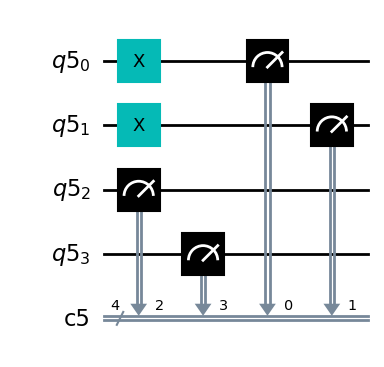

In [89]:
from numpy import binary_repr

from qat.lang import Program, H, X, Y, Z, I, PH, S, T, RX, RY, RZ, CNOT, ISWAP, SQRTSWAP, CCNOT, SWAP

from qat.interop.qiskit import qlm_to_qiskit
import matplotlib as mpl

prog = Program()
nbqbits = cluster_ops_sp[0].nbqbits
ket_hf = binary_repr(hf_init_sp)
list_ket_hf = [int(c) for c in ket_hf]
qb = prog.qalloc(nbqbits)
# print(list_ket_hf)
for j in range(nbqbits):
    if int(list_ket_hf[j] == 1):
        prog.apply(X, qb[j])
circ = prog.to_circ()
qpu = get_default_qpu()
job = circ.to_job(job_type="OBS", observable=hamiltonian_sp)
res = qpu.submit(job)
print(res.value)


#print(hf_init_sp) = 12
# print(ket_hf) = 1100
# print(hf_init_sp) = [1, 1, 0, 0]

# Basically we have the number 12 and its binary for it will be 1100 so if I have 

ckt = qlm_to_qiskit(circ)
ckt.draw(output='mpl')

So basically, as I have 12 is the value of the hf_init_sp and the form of its binary is 1100, then in the language of the circuit contruct is from beginning the intitial state is 0000 (the number of qubit ==4)then the if condition is to apply XX to the first two zeros to flip that states to 11 so overall I have state 1100 and i measure its res.value for the minimum energy for appling that state to the spin hamiltonian

$$\langle 1100 | H_{\text{spin}} | 1100 \rangle$$

Now I make a quick test for a list_box with a value from 0 to 15 and transfering its all to the binary form to get it box_states with states of ket representation then measuring its values to the H_spin and sorted the measurements in the increasing order

Box State: 0000, Value: 0, Excitation: 0.7055696145599998
Box State: 0001, Value: 1, Excitation: 0.2242966834640164
Box State: 0010, Value: 2, Excitation: 0.22429668346401646
Box State: 0100, Value: 4, Excitation: -0.5417148906636157
Box State: 1000, Value: 8, Excitation: -0.5417148906636157
Box State: 0011, Value: 3, Excitation: 0.4388389034277981
Box State: 0101, Value: 5, Excitation: -0.5427820988577581
Box State: 1001, Value: 9, Excitation: -0.36101056228045325
Box State: 0110, Value: 6, Excitation: -0.36101056228045325
Box State: 1010, Value: 10, Excitation: -0.542782098857758
Box State: 1100, Value: 12, Excitation: -1.1161514489386022
Box State: 0111, Value: 7, Excitation: 0.33373738058516944
Box State: 1011, Value: 11, Excitation: 0.33373738058516944
Box State: 1101, Value: 13, Excitation: -0.4552413976535987
Box State: 1110, Value: 14, Excitation: -0.4552413976535986
Box State: 1111, Value: 15, Excitation: 0.9014838046911698


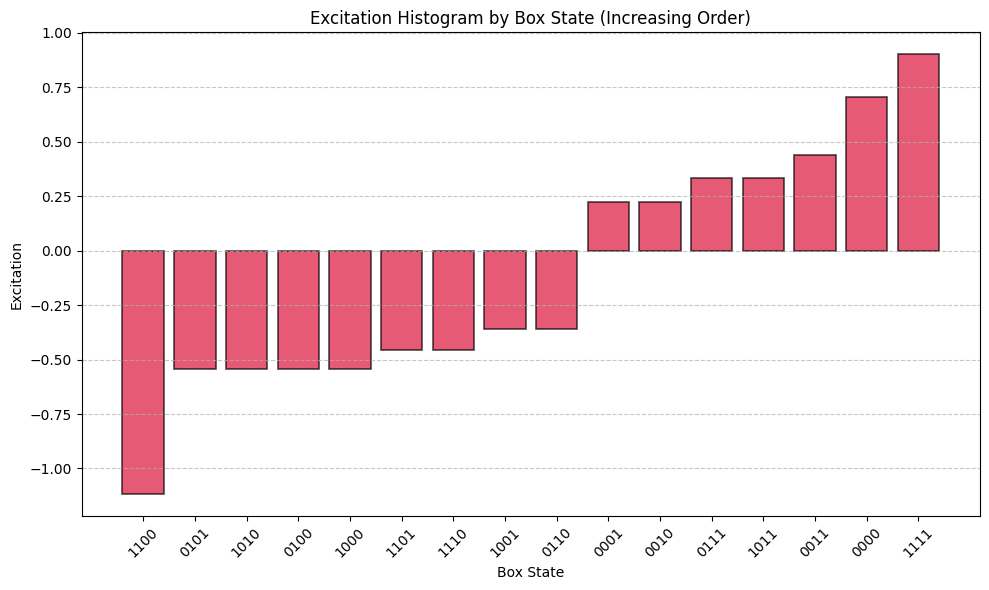

In [90]:
import matplotlib.pyplot as plt
from numpy import binary_repr
from qat.lang import Program, X
from qat.qpus import get_default_qpu

# Assuming hamiltonian_sp is defined somewhere in your code
# and box_list contains the values you mentioned
box_list = [0, 1, 2, 4, 8, 3, 5, 9, 6, 10, 12, 7, 11, 13, 14, 15]

def create_program(value, nbqbits):
    ket_value = binary_repr(value)
    padded_ket_value = ket_value.zfill(nbqbits)  # Pad with zeros to the left
    list_ket_value = [int(c) for c in padded_ket_value]

    prog = Program()
    qb = prog.qalloc(nbqbits)

    # Apply X gates based on the binary representation of the current value
    for j in range(min(nbqbits, len(list_ket_value))):
        if list_ket_value[j] == 1:
            prog.apply(X, qb[j])

    return prog

excitation_values = []
box_states = []

for value in box_list:
    nbqbits = cluster_ops_sp[0].nbqbits
    prog = create_program(value, nbqbits)

    circ = prog.to_circ()
    qpu = get_default_qpu()

  
    job = circ.to_job(job_type="OBS", observable=hamiltonian_sp)
    res = qpu.submit(job)

    box_states.append(binary_repr(value, width=nbqbits))
    excitation_values.append(res.value)

    # Print the box state and the result for each value
    print(f"Box State: {binary_repr(value, width=nbqbits)}, Value: {value}, Excitation: {res.value}")

# Sorting the data by excitation values
sorted_data = sorted(zip(box_states, excitation_values), key=lambda x: x[1])

# Extracting sorted box states and excitation values
sorted_box_states, sorted_excitation_values = zip(*sorted_data)


plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(sorted_box_states, sorted_excitation_values, color='crimson', alpha=0.7, edgecolor='black', linestyle='-', linewidth=1.2)
plt.xlabel('Box State')
plt.ylabel('Excitation')
plt.title('Excitation Histogram by Box State (Increasing Order)')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()